In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Path to your input Excel file
file_path = "C:/Users/meian/Desktop/Comp Eng Project/coe-final-project/coe-final-project/force_displacement/Exp_DF_StrRtDpn_TmpDpn.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

In [15]:
# Function to plot displacement (D) vs force (F) for each condition in a sheet
from operator import le


def plot_displacement_force(sheet, sheet_name):
    # Group the columns by their condition (excluding the _D, _F, _U, _L suffix)
    columns = sheet.columns
    condition_names = sorted(set([col.rsplit('_', 1)[0] for col in columns]))

    for condition in condition_names:
        # Extract the relevant columns for this condition (_D and _F)
        displacement_column = f"{condition}_D"
        force_column = f"{condition}_F"

        # Ensure both displacement and force columns exist before plotting
        if displacement_column in columns and force_column in columns:
            displacement = sheet[displacement_column]
            force = sheet[force_column]

            # Plot the graph
            plt.figure(figsize=(8, 6))
            plt.plot(displacement, force, label=f"{displacement_column} vs {force_column}")
            plt.xlabel('Displacement, mm')
            plt.ylabel('Force, kN')
            plt.xlim(left=0)
            plt.ylim(bottom=0)
            plt.title(f'{condition}')
            plt.grid(True)
            plt.show()

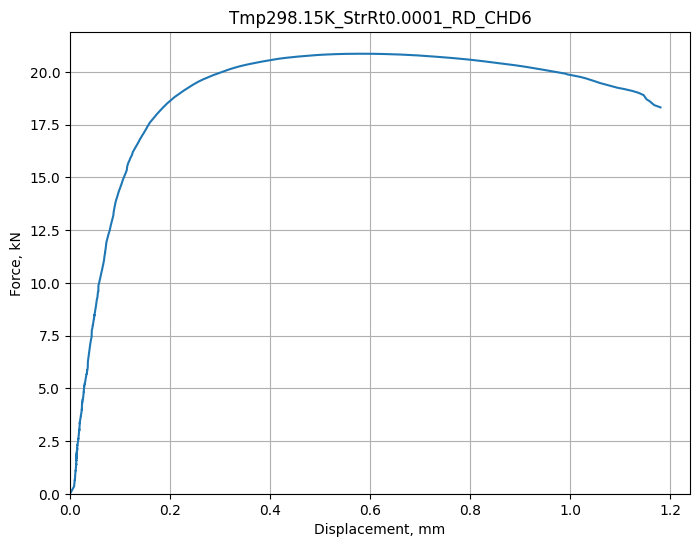

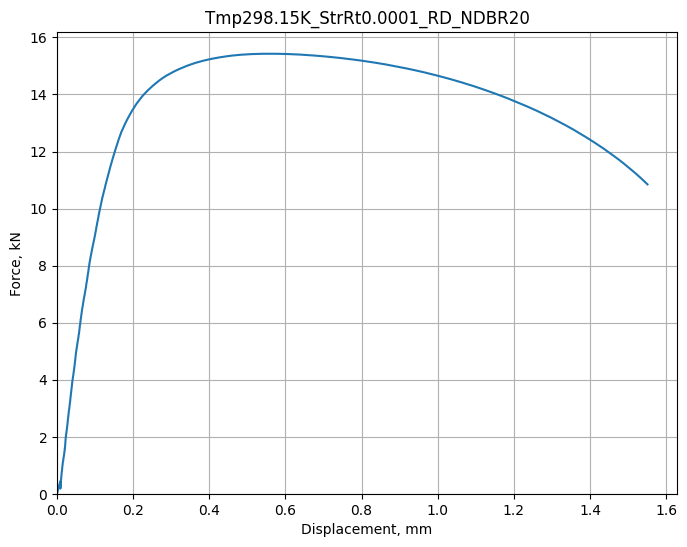

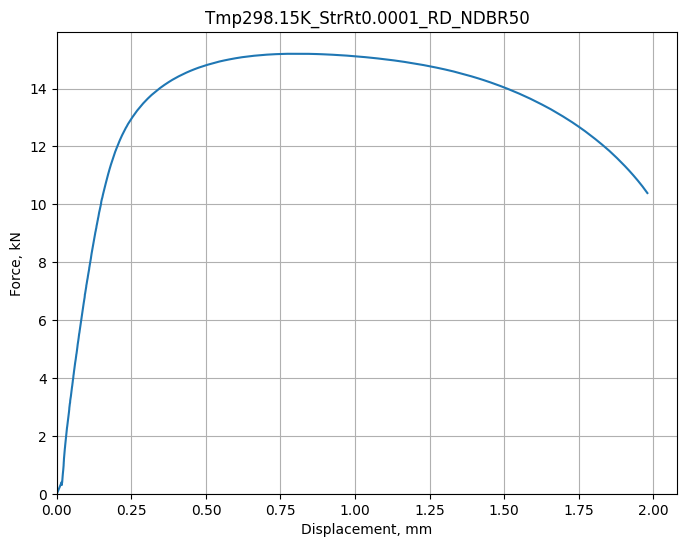

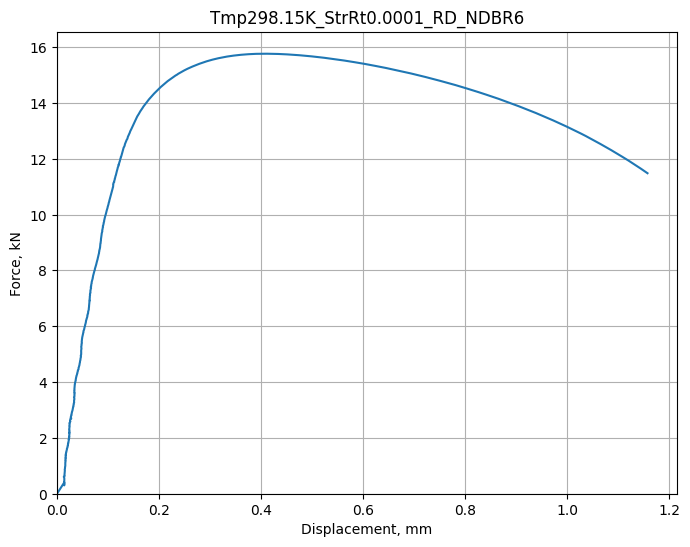

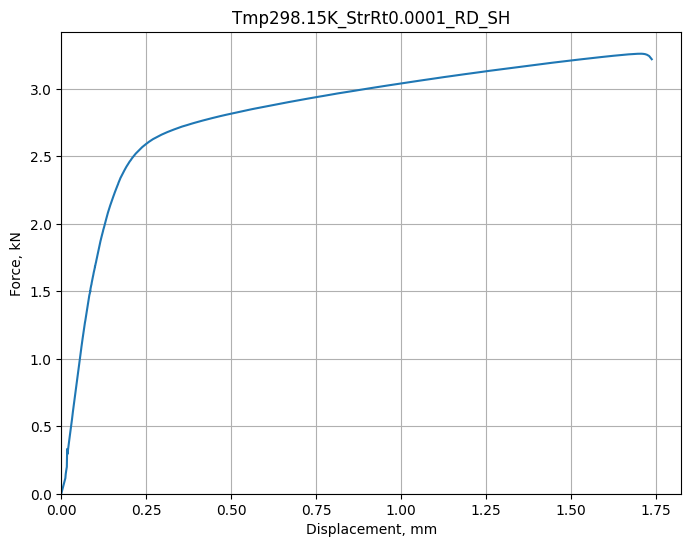

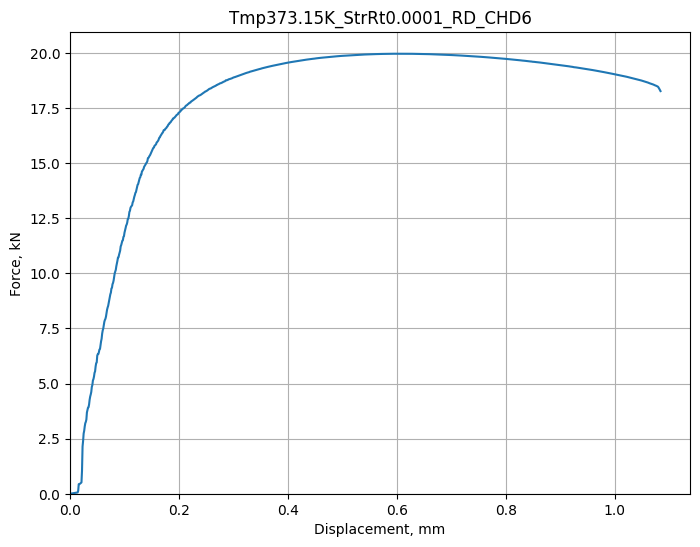

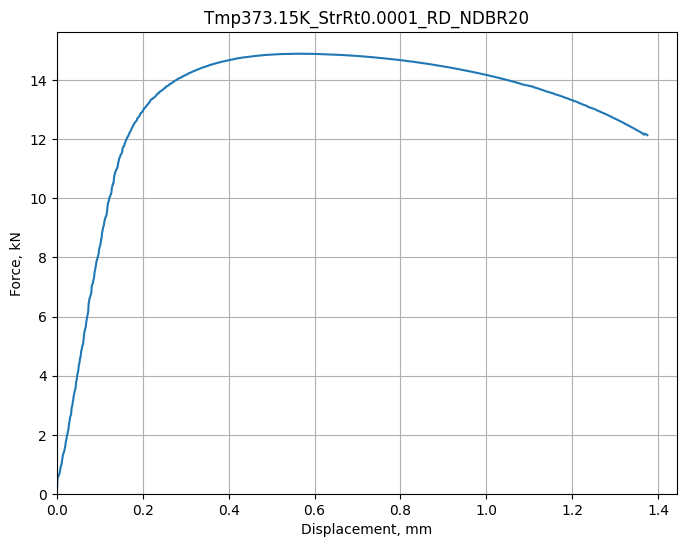

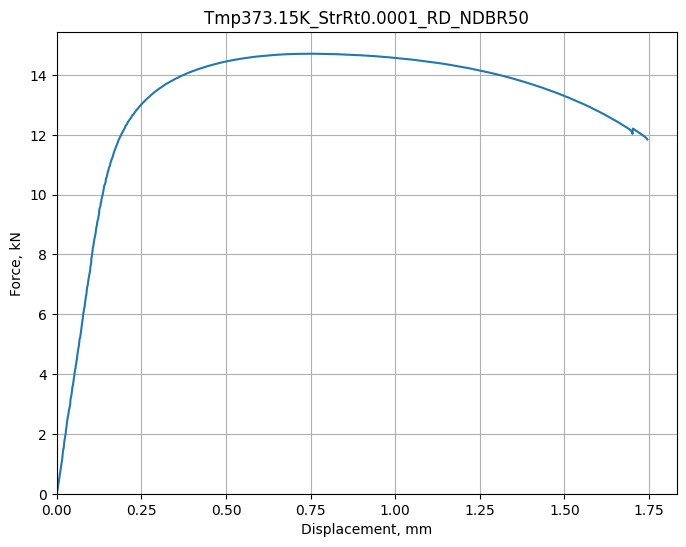

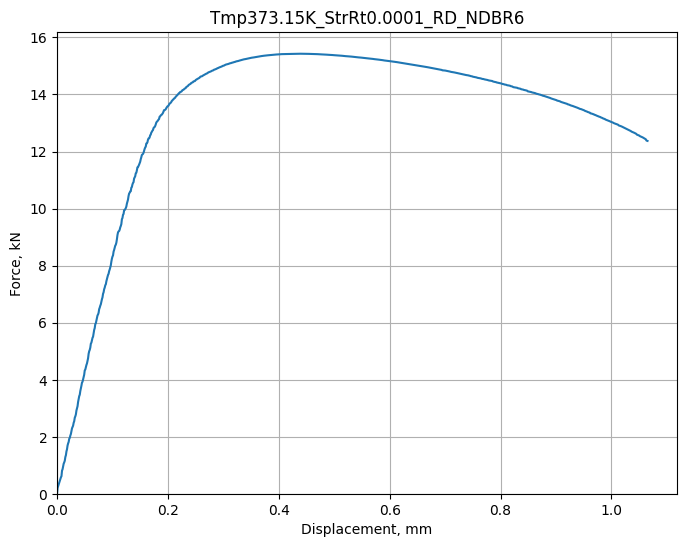

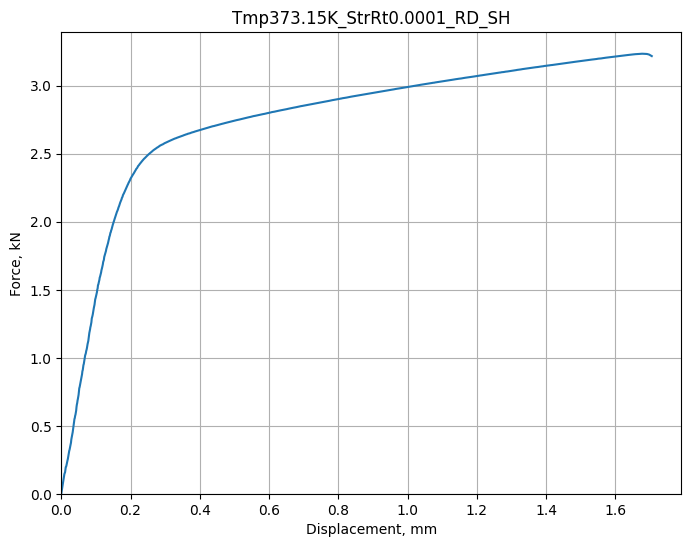

In [16]:
# Process each sheet in the Excel file
for sheet_name in xls.sheet_names:
    sheet = pd.read_excel(file_path, sheet_name=sheet_name)
    plot_displacement_force(sheet, sheet_name)